In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

#Load json as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

In [2]:
#Inspect DataFrame
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt                    500 n

# Question 1: Find the 10 countries with most projects

## Method 1

In [3]:
#Create an empty dictionary
countries = {}

#Iterate over the 'countryname' column in df and append to countries.keys for each occurance
for entry in df['countryname']:
    if entry in countries.keys():
        countries[entry] += 1
    else:
        countries[entry] = 1
#Construct a DataFramce from the Dictionary created above and chain sort values and head functions
pd.DataFrame.from_dict(countries,orient='index',columns=['Count']).sort_values(by=['Count'],ascending=False).head(10)

,Count
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Africa,11
Republic of Mozambique,11


## Method 2

In [4]:
#Create series of 'countryname' column and chain value_counts and head function
df.countryname.value_counts().head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

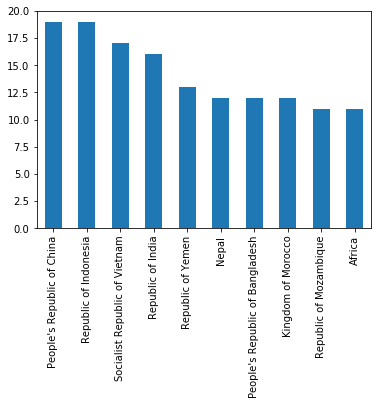

In [5]:
#Use plot() function to create a bar chart
df.countryname.value_counts().head(10).plot(kind='bar', ylim=[0, 20])

# Question 2: Find the top 10 major project themes

In [6]:
#Load json as string
data = json.load((open('data/world_bank_projects.json')))

#Create DataFrame from nested elements using normalization
project = json_normalize(data, 'mjtheme_namecode')

## Method 1

In [7]:
#Use value_counts to identify top 10 project codes
project.code.value_counts().head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

## Method 2

In [8]:
#Use groupby and sort_values to identify top 10 project codes
project.groupby('code').count().sort_values(by='name',ascending=False).head(10)

,name
code,
11,250
10,216
8,210
2,199
6,168
4,146
7,130
5,77
9,50


# Question 3:  Create a dataframe with the missing names filled in

In [9]:
#Fill empty values with NaN
project = project.replace('', np.nan)

#First sort_values and then forward fill NaN values
project = project.sort_values(by=['code', 'name']).fillna(method='ffill')

In [10]:
#Top 10 projects by name
project = project.name.value_counts().head(10)
project

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

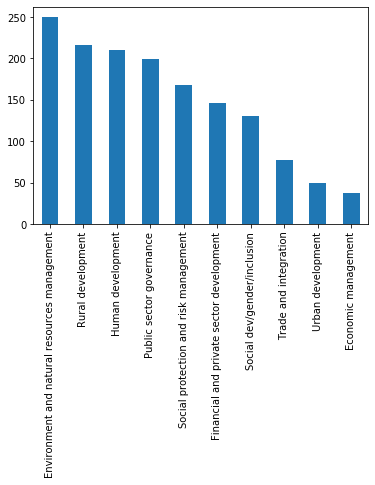

In [11]:
#Create a bar chart of top 10 project themes
project.plot(kind='bar')